In [1]:
from qiskit import QuantumCircuit , ClassicalRegister ,QuantumRegister 

In [2]:
from qiskit_aer import Aer
from qiskit import transpile

In [3]:
from qiskit.visualization import plot_histogram


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from qiskit.quantum_info import random_unitary ,Statevector

In [7]:
from qiskit.circuit.library import UnitaryGate

In [8]:
# q = QuantumRegister(3)
# c = ClassicalRegister(2)
qc = QuantumCircuit(3, 2)
# qc.draw('mpl')

In [9]:
qc.h(1)


In [10]:
qc.cx(1,2)

In [11]:

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [12]:
U = random_unitary(2)
U_gate = UnitaryGate(U, label="u")
qc.append(U_gate, [0])

In [13]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [14]:
qc.cx(0,1)


In [15]:

qc.h(0)

In [16]:
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [17]:
qc.measure ([1,0] , [1,0])


In [18]:

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()

In [19]:

with qc.if_test((qc.clbits[1], 1)):
    qc.x(2)
with qc.if_test((qc.clbits[1], 1)):   
    qc.z(2)

In [20]:
# qc.measure(2,1)


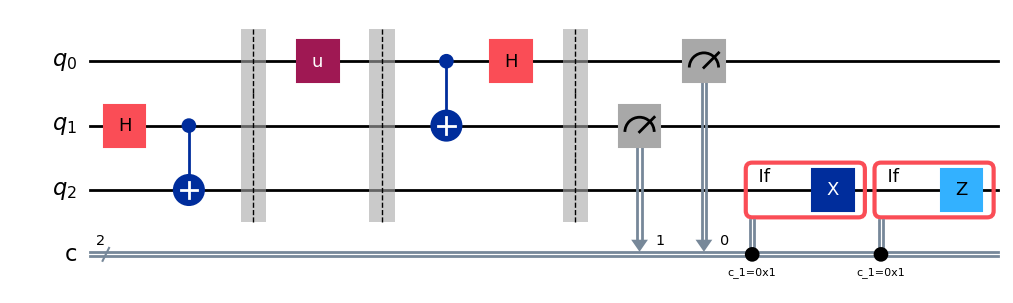

In [21]:
qc.draw('mpl')

In [22]:
%reset -f